## Preliminaries
Some visualizations of the Standford 40 dataset

### Import relevant libraries

In [1]:
from mpl_toolkits.axes_grid1 import ImageGrid
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import squarify
import cv2

### Read in csv with image data
Csv includes filename, action class, class id, and bounding box coordinates

In [2]:
file = "../Resources/image_info.csv"
images_info = pd.read_csv(file)

In [6]:
# Remove underscores in action class string
for index, row in images_info.iterrows():
    action = row['Action']
    action_list = action.split("_")

    images_info.at[index, 'Action'] = " ".join(action_list[:-1])

In [7]:
images_info.head()

,Filename,Action,Action ID,x1,y1,x2,y2
0,applauding_001.jpg,applauding,0,28,57,258,400
1,applauding_002.jpg,applauding,0,203,20,421,284
2,applauding_003.jpg,applauding,0,268,85,437,299
3,applauding_004.jpg,applauding,0,78,21,246,416
4,applauding_005.jpg,applauding,0,88,61,227,451


## Display Images
Sample preview of one image from each of the 40 action classes in the Stanford dataset

In [8]:
img_list = []

base_path = "../Resources/new"
for i in range(0, 40):
    img_name = images_info['Filename'].loc[images_info['Action ID'] == i].values[5]
    img_file = f"{base_path}/{img_name}"
    
    img = np.uint8(plt.imread(img_file))
    img = cv2.resize(img, (224, 224))
    img_list.append(img)

Show the images in a 5x8 grid

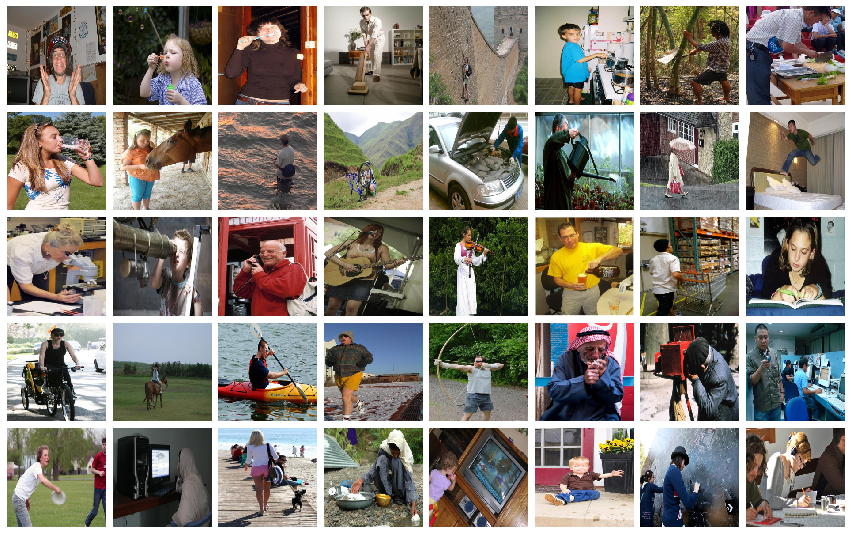

In [18]:
fig = plt.figure(figsize=(15., 15.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(5, 8),  
                 axes_pad=0.1,  
                 )

for ax, im in zip(grid, img_list):
    ax.imshow(im)
    ax.axis("off")

plt.savefig("../Output/plots/image.png")
plt.show()

## Distribution of Action Classes
- Build a wordcloud of all classes
- Rank action classes based on the number of images per class
- Choose the ten most well represented action classes

In [12]:
# Count of images per class
actions_df = pd.DataFrame(images_info.groupby(['Action']).count())
actions_df = actions_df.sort_values('Filename', ascending=False)

### Wordcloud

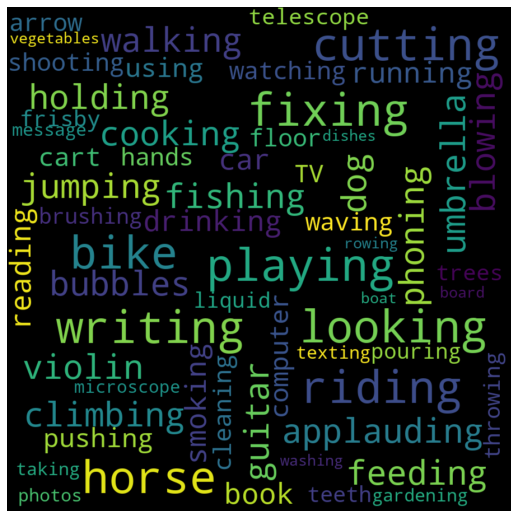

In [73]:
comment_words = ' '
actions = actions_df['Filename'].index.values

# Iterate thourgh csv, add actions to comment_words
for action in actions:
    action_str = str(action) 
    comment_words = comment_words + action_str + " "

# Build wordcloud
wordcloud = WordCloud(width = 900, height = 900, 
                background_color ='black', 
                min_font_size = 5,
                max_font_size=80).generate(comment_words) 
  
# plot wordcloud                     
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("../Output/plots/all_actions.png")
  
plt.show()

### Number of images per class

In [ ]:
all_actions = actions_df['Filename'].index.values
h = actions_df['Filename'].values

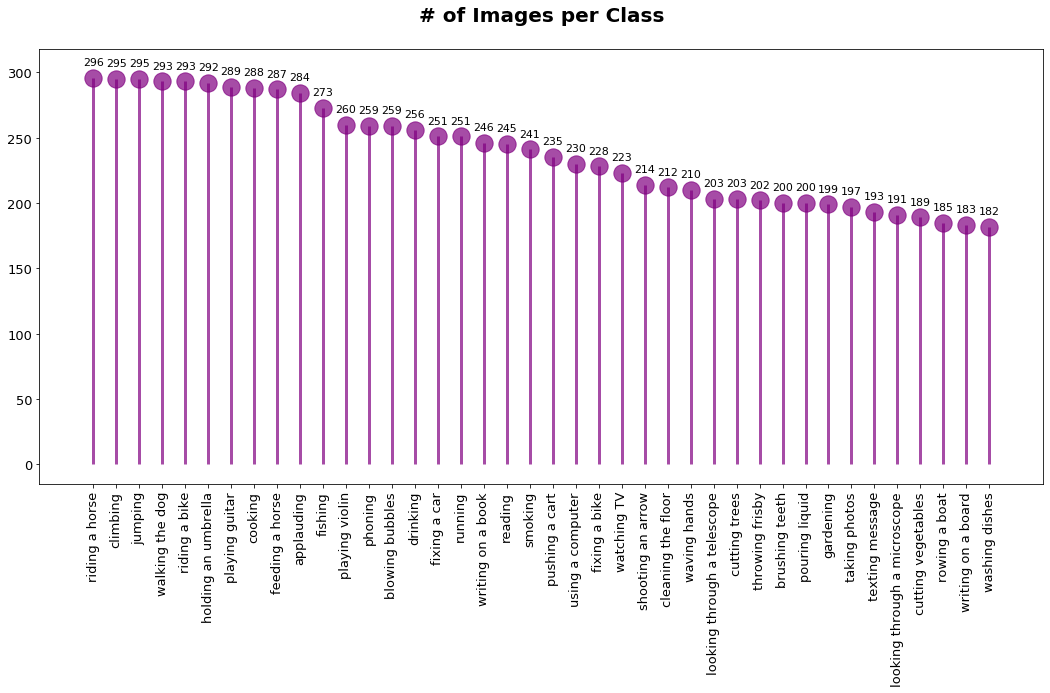

In [72]:
fig = plt.figure(figsize=(18., 8.))

# Plot
plt.vlines(all_actions, ymin=0, ymax=h, alpha=0.7, linewidth=3, color='purple')
plt.scatter(all_actions, h, s=300, color='purple', alpha=0.7)

# Tick labels and title
plt.tick_params(labelsize=13)
plt.xticks(rotation=90)
plt.title("# of Images per Class\n", fontsize=20, fontweight="bold")

# Annotate plot with image count
for x1, y1, tex in zip(all_actions, h, h):
    t = plt.text(x1, 12+y1, round(tex, 2), horizontalalignment='center', 
                 verticalalignment='center', fontsize=11)


plt.savefig("../Output/plots/images_per_actions.png")
plt.show()

### Ten most well distributed action classes
Build a tree map

In [74]:
ten_actions = actions_df['Filename'].index.values[0:10]
counts = actions_df['Filename'].values[0:10]

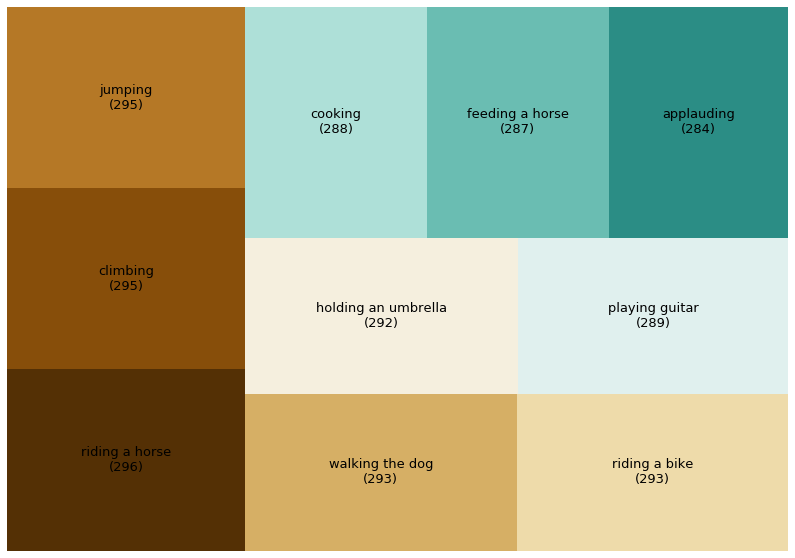

In [151]:
# Formatted label for tree map annotation + color distribution
labels = [f"{ten_actions[i]}\n({counts[i]})" for i in range(len(ten_actions))] 
colors = [plt.cm.BrBG(i/float(len(ten_actions)+1)) for i in range(len(ten_actions))]

# Format plot
fig = plt.figure(figsize=(14., 10.))
plt.rcParams.update({'font.size': 13})

# Plot
squarify.plot(sizes=counts, label=labels, color=colors, alpha=1)

plt.axis("off")
plt.savefig("../Output/plots/images_per_ten.png")
plt.show()

### Distribution of Image Sizes

In [114]:
base_path = "../Resources/new"
img_names = images_info['Filename'].values

In [115]:
v_size = [] # vertical dimension
h_size = [] # horizontal dimension

for filename in img_names:
    img_path = f"{base_path}/{filename}"
    img = plt.imread(img_path)
    
    v_size.append(img.shape[0])
    h_size.append(img.shape[1])

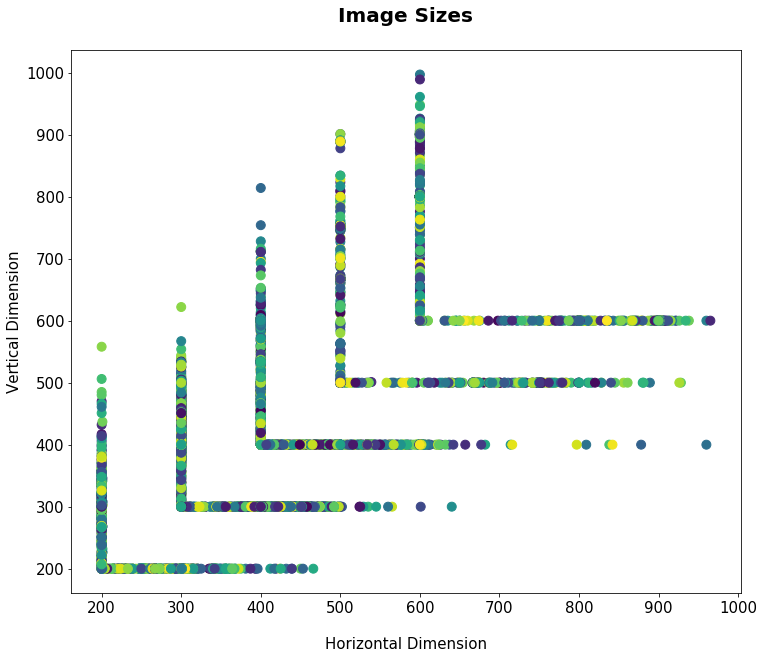

In [122]:
fig = plt.figure(figsize=(12., 10.))

# Plot
plt.scatter(v_size, h_size, c=np.random.randint(0, 1000, len(v_size)), s=80)

# Ticks, axes lables, title
plt.tick_params(labelsize=15)
plt.title("Image Sizes\n", fontsize=20, fontweight='bold')
plt.ylabel('Vertical Dimension', fontsize=15)
plt.xlabel('\nHorizontal Dimension', fontsize=15)

plt.savefig("../Output/plots/image_sizes.png")
plt.show()